In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.metrics import accuracy_score, confusion_matrix
import sklearn.svm as svm

%matplotlib inline

### Data pre-processing - Understand the data and treat missing values (Use box plot), outliers

In [2]:
vehicle_df = pd.read_csv('vehicle.csv')
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [3]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [4]:
vehicle_df['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

In [5]:
print((vehicle_df == '?').sum())

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


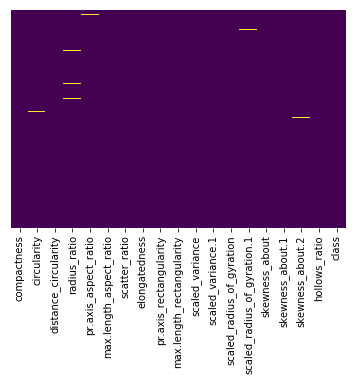

In [6]:
sns.heatmap(vehicle_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [8]:
vehicle_df.shape

(846, 19)

In [9]:
# Out of 846 records, 41 rows has null values. This can be removed. But, before that we can check the outliers
# Keeping a copy of dataset with non-null rows only
vehicle_df1 = vehicle_df.dropna()
vehicle_df1.shape

(813, 19)

In [10]:
def treat_outliers(col, df):
    q3 = df[col].quantile(0.75)
    q1 = df[col].quantile(0.25)
    iqr = q3 - q1
    lowval = q1 - 1.5* iqr
    highval = q3 + 1.5 * iqr
    loc_ret = df.loc[(df[col] > lowval) & (df[col] < highval)]
    return loc_ret

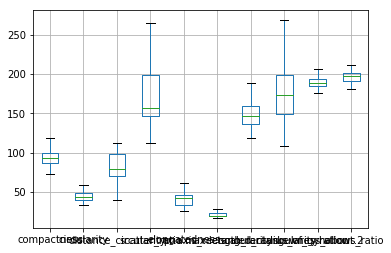

In [11]:
boxplot = vehicle_df1.boxplot(column=['compactness','circularity','distance_circularity','scatter_ratio','elongatedness','pr.axis_rectangularity','max.length_rectangularity',
'scaled_radius_of_gyration','skewness_about.2','hollows_ratio'])
# These columns have no outliers

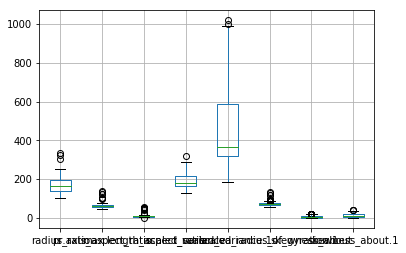

In [12]:
boxplot = vehicle_df1.boxplot(column=['radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_variance',
                                      'scaled_variance.1','scaled_radius_of_gyration.1','skewness_about','skewness_about.1'])
# These columns (n=8) have outliers

In [13]:
vehicle_df1 = treat_outliers('pr.axis_aspect_ratio', vehicle_df1)
vehicle_df1.shape

(805, 19)

In [14]:
vehicle_df1 = treat_outliers('radius_ratio', vehicle_df1)
vehicle_df1.shape

(805, 19)

In [15]:
vehicle_df1 = treat_outliers('max.length_aspect_ratio', vehicle_df1)
vehicle_df1.shape

(800, 19)

In [16]:
vehicle_df1 = treat_outliers('scaled_variance', vehicle_df1)
vehicle_df1.shape

(800, 19)

In [17]:
vehicle_df1 = treat_outliers('scaled_variance.1', vehicle_df1)
vehicle_df1.shape

(799, 19)

In [18]:
vehicle_df1 = treat_outliers('scaled_radius_of_gyration.1', vehicle_df1)
vehicle_df1.shape

(784, 19)

In [19]:
vehicle_df1 = treat_outliers('skewness_about', vehicle_df1)
vehicle_df1.shape

(772, 19)

In [20]:
vehicle_df1 = treat_outliers('skewness_about.1', vehicle_df1)
vehicle_df1.shape

(769, 19)

In [26]:
## By treating outliers of dataset after dropping na rows, the total records reduced by 10%

In [21]:
## Instead of removing the rows with na, we can replace with mean values
# ['circularity','radius_ratio','pr.axis_aspect_ratio','scaled_radius_of_gyration.1','skewness_about.2']
cols_with_na = vehicle_df.columns[1:-1] 
for col in cols_with_na:
    vehicle_df[col].fillna(vehicle_df[col].mean(), inplace =True)
vehicle_df.shape

(846, 19)

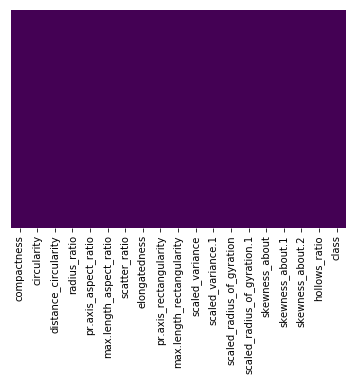

In [22]:
sns.heatmap(vehicle_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

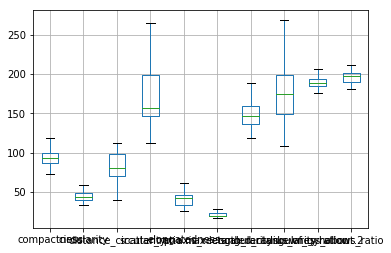

In [23]:
boxplot = vehicle_df.boxplot(column=['compactness','circularity','distance_circularity','scatter_ratio','elongatedness','pr.axis_rectangularity','max.length_rectangularity',
'scaled_radius_of_gyration','skewness_about.2','hollows_ratio'])
# These columns have no outliers

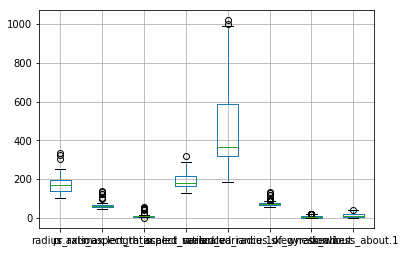

In [24]:
boxplot = vehicle_df.boxplot(column=['radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_variance',
                                      'scaled_variance.1','scaled_radius_of_gyration.1','skewness_about','skewness_about.1'])
# These 8 columns have outliers

In [25]:
cols_with_outliers = ['radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_variance',
                                      'scaled_variance.1','scaled_radius_of_gyration.1','skewness_about','skewness_about.1']
for col in cols_with_outliers:
    vehicle_df = treat_outliers(col, vehicle_df)
vehicle_df.shape

(801, 19)

In [27]:
# The rows are reduced by 6% only. So we keep the dataset whose na values are treated with mean values 

### Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

In [28]:
# Converting class variable into an int
vehicle_df['class'] = vehicle_df['class'].replace('van', 0)
vehicle_df['class'] = vehicle_df['class'].replace('car', 1)
vehicle_df['class'] = vehicle_df['class'].replace('bus', 2)
vehicle_df['class'] = vehicle_df['class'].astype('int32')

In [29]:
vehicle_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,801.0,93.717853,8.031207,73.0,88.0,93.0,100.0,116.0
circularity,801.0,44.878046,6.137508,33.0,40.0,44.0,49.0,59.0
distance_circularity,801.0,82.420027,15.406765,40.0,70.0,80.0,98.0,112.0
radius_ratio,801.0,168.466078,31.322171,104.0,142.0,167.0,194.0,246.0
pr.axis_aspect_ratio,801.0,61.265116,5.620234,47.0,57.0,61.0,65.0,76.0
max.length_aspect_ratio,801.0,8.152310,2.032061,3.0,7.0,8.0,10.0,13.0
scatter_ratio,801.0,169.217106,32.823015,112.0,147.0,157.0,198.0,262.0
elongatedness,801.0,40.800167,7.707952,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,801.0,20.602681,2.557605,17.0,19.0,20.0,23.0,28.0
max.length_rectangularity,801.0,148.094881,14.490376,118.0,137.0,146.0,159.0,188.0


In [30]:
vehicle_df.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
compactness,1.0,0.68,0.78,0.74,0.19,0.49,0.81,-0.79,0.81,0.67,0.79,0.81,0.58,-0.23,0.2,0.15,0.28,0.35,0.036
circularity,0.68,1.0,0.79,0.64,0.2,0.56,0.85,-0.82,0.85,0.96,0.81,0.84,0.93,0.096,0.14,-0.018,-0.14,0.02,0.16
distance_circularity,0.78,0.79,1.0,0.8,0.24,0.66,0.9,-0.91,0.9,0.77,0.88,0.89,0.7,-0.21,0.09,0.26,0.1,0.3,0.066
radius_ratio,0.74,0.64,0.8,1.0,0.66,0.45,0.79,-0.84,0.76,0.57,0.79,0.78,0.55,-0.38,0.031,0.18,0.4,0.49,0.24
pr.axis_aspect_ratio,0.19,0.2,0.24,0.66,1.0,0.12,0.19,-0.3,0.16,0.14,0.21,0.18,0.15,-0.31,-0.059,-0.04,0.4,0.41,0.23
max.length_aspect_ratio,0.49,0.56,0.66,0.45,0.12,1.0,0.49,-0.49,0.49,0.65,0.41,0.45,0.41,-0.31,0.082,0.13,0.027,0.37,-0.37
scatter_ratio,0.81,0.85,0.9,0.79,0.19,0.49,1.0,-0.97,0.99,0.8,0.98,0.99,0.8,0.028,0.057,0.21,-0.024,0.098,0.29
elongatedness,-0.79,-0.82,-0.91,-0.84,-0.3,-0.49,-0.97,1.0,-0.95,-0.77,-0.97,-0.96,-0.76,0.06,-0.036,-0.18,-0.084,-0.19,-0.35
pr.axis_rectangularity,0.81,0.85,0.9,0.76,0.16,0.49,0.99,-0.95,1.0,0.81,0.96,0.99,0.79,0.043,0.066,0.22,-0.047,0.081,0.26
max.length_rectangularity,0.67,0.96,0.77,0.57,0.14,0.65,0.8,-0.77,0.81,1.0,0.75,0.79,0.87,0.077,0.13,-0.0048,-0.14,0.053,0.026


In [31]:
# Bylooking at the correlation between the independent variables, many variables show strong correlation
# pr.axis_rectangularity and distance_circularity - 0.9
# max.length_rectangularity and circularity - 0.96
# scaled_radius_of_gyration and circularity - 0.93
# and many variables show correlation greater than 0.7

# To reduce multi collenarity effect, we can drop a few columns. Instead, we are gonna do PCA

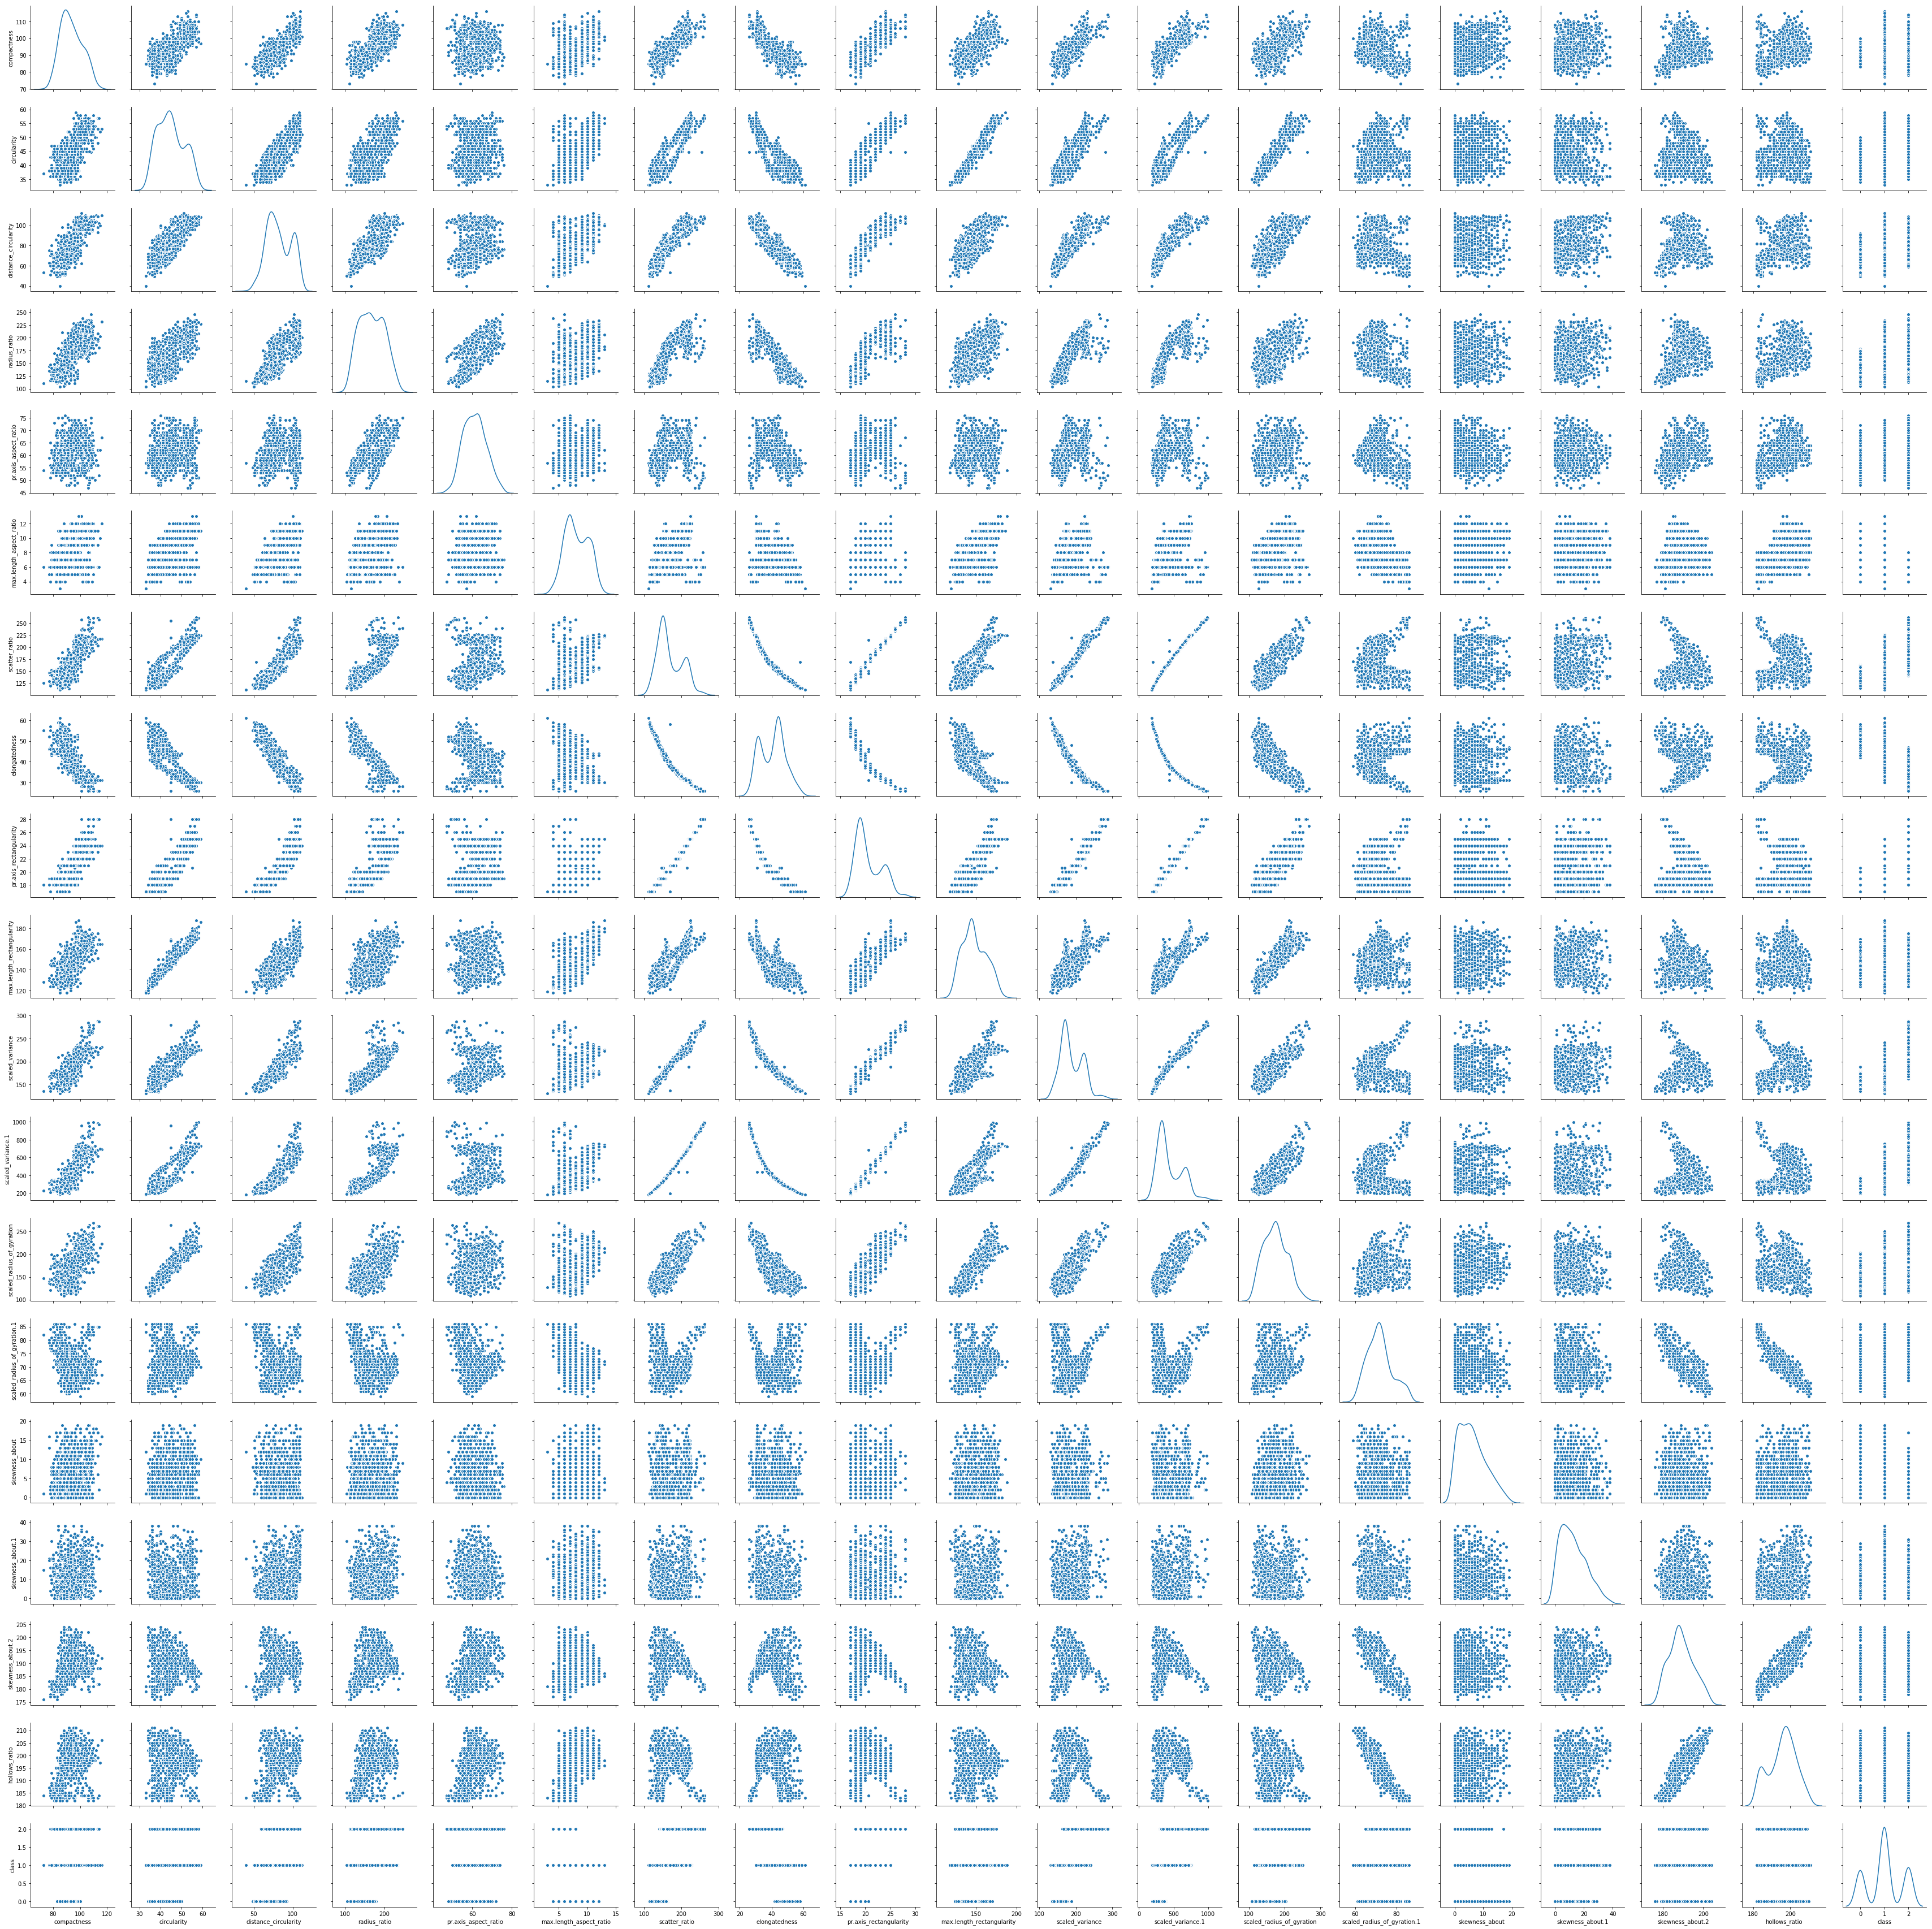

In [32]:
sns.pairplot(vehicle_df, diag_kind='kde')

In [33]:
## From the pairplot, we can see most of the columns show linear relationship. That should be a good indication to use PCA.
## As we are going to use PCA, we dont need to remove any original dimensions. We can decide based on PCA plot

### Use PCA from scikit learn and elbow plot to find out reduced number of dimension

In [34]:
X = vehicle_df[vehicle_df.columns[1:-1]]
y = vehicle_df['class']

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 845
Data columns (total 17 columns):
circularity                    801 non-null float64
distance_circularity           801 non-null float64
radius_ratio                   801 non-null float64
pr.axis_aspect_ratio           801 non-null float64
max.length_aspect_ratio        801 non-null int64
scatter_ratio                  801 non-null float64
elongatedness                  801 non-null float64
pr.axis_rectangularity         801 non-null float64
max.length_rectangularity      801 non-null int64
scaled_variance                801 non-null float64
scaled_variance.1              801 non-null float64
scaled_radius_of_gyration      801 non-null float64
scaled_radius_of_gyration.1    801 non-null float64
skewness_about                 801 non-null float64
skewness_about.1               801 non-null float64
skewness_about.2               801 non-null float64
hollows_ratio                  801 non-null int64
dtypes: float64(1

In [48]:
sc = StandardScaler()
#Standardizing X
X_std =  sc.fit_transform(X)
cov_matrix = np.cov(X_std.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Values \n', eigenvalues)

Eigen Values 
 [9.06601794e+00 3.33940459e+00 1.21405130e+00 1.13437864e+00
 8.86439851e-01 6.30428870e-01 3.21885431e-01 1.36264485e-01
 7.91047829e-02 6.26921401e-02 4.28958532e-02 3.39083411e-02
 2.64487430e-02 1.81827831e-02 1.65064012e-02 9.40603666e-03
 3.23381008e-03]


In [49]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
eig_pairs.sort()
eig_pairs.reverse()
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]
print('Eigen values in descending order: \n', eigvalues_sorted)

Eigen values in descending order: 
 [9.066017938018145, 3.339404593401847, 1.2140513001040072, 1.134378639673746, 0.8864398505254583, 0.6304288700300773, 0.32188543148897447, 0.13626448548318562, 0.07910478286527821, 0.06269214013229966, 0.0428958531769254, 0.0339083410806904, 0.02644874298231751, 0.01818278312063793, 0.016506401173709846, 0.009406036658415117, 0.0032338100843188563]


In [50]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_explained)

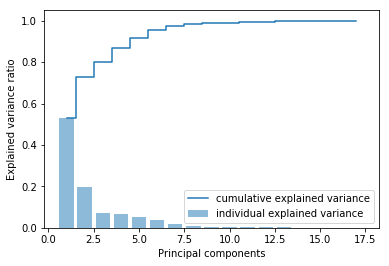

In [51]:
plt.bar(range(1,18), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,18),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [52]:
# We can have 7 PCA components, as they cover 95% of the variance 

### Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy.

In [54]:
P_reduce = np.array(eigvectors_sorted[0:7])   # Using only 7 principal components, covering 95% variance
Proj_data_2D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

In [55]:
X_std.shape, P_reduce.shape, Proj_data_2D.shape

((801, 17), (7, 17), (801, 7))

In [56]:
Cs = [0.01,0.05,0.5,1]
kernels = ['linear','rbf']
param_grid = {'C': Cs, 'kernel' : kernels}
grid_search = GridSearchCV(svm.SVC(), param_grid, cv=10)
grid_search.fit(Proj_data_2D, y)
grid_search.best_params_

{'C': 1, 'kernel': 'rbf'}

In [57]:
clf = svm.SVC(kernel='rbf', C=1)
scores = cross_val_score(clf, Proj_data_2D, y, cv=5)
scores 

array([0.95652174, 0.92546584, 0.97515528, 0.91194969, 0.94968553])

In [58]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.94 (+/- 0.04)
